# Amine Activation ML App

## Import all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pickle
import smogn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


## Import raw activation data

In [2]:
df = pd.read_csv(r'raw_data.csv')
df

,lot_0,acid_1,acid_mn_2,acid_mp_3,acid_pdi_4,acid_ls_5,scale_6,eda_7,edc_8,nhs_9,...,scale_dummy_21,yield_SK3,yield_UCHT1,yield_53_67,MFI_SK3,SK3_agg,MFI_UCHT1,UCHT1_agg,MFI_53_67,53_67_agg
0,NaN,1519,56.0,98.0,1.79,128.0,50,2000,200,200,...,0,NaN,50.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1519,56.0,98.0,1.79,128.0,50,2000,300,200,...,0,NaN,49.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1232,58.0,109.0,1.90,220.0,50,1700,250,200,...,0,NaN,38.0,34.0,NaN,NaN,161.0,NaN,128.0,NaN
3,NaN,1232,58.0,109.0,1.90,220.0,50,1700,300,200,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1232,58.0,109.0,1.90,220.0,50,1700,400,200,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,D2614,D2593,54.0,74.0,1.44,140.0,50,2000,800,200,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,D2672,D2656,56.0,97.0,1.60,175.0,50,2000,400,200,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,D2673,D2656,56.0,97.0,1.60,175.0,50,2000,500,200,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,D2674,D2656,56.0,97.0,1.60,175.0,50,2000,650,200,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create sub-dataset with relevant columns

In [3]:
subdf = df.take([2,3,4,5,6,7,8,9,10,12,16,20,21],axis=1)
subdf

,acid_mn_2,acid_mp_3,acid_pdi_4,acid_ls_5,scale_6,eda_7,edc_8,nhs_9,time_10,temp_12,LS_16,time_dummy_20,scale_dummy_21
0,56.0,98.0,1.79,128.0,50,2000,200,200,1,20,88.0,0,0
1,56.0,98.0,1.79,128.0,50,2000,300,200,1,20,117.0,0,0
2,58.0,109.0,1.90,220.0,50,1700,250,200,1,20,146.0,0,0
3,58.0,109.0,1.90,220.0,50,1700,300,200,1,20,169.0,0,0
4,58.0,109.0,1.90,220.0,50,1700,400,200,1,20,186.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,54.0,74.0,1.44,140.0,50,2000,800,200,24,4,110.0,1,0
125,56.0,97.0,1.60,175.0,50,2000,400,200,24,4,79.0,1,0
126,56.0,97.0,1.60,175.0,50,2000,500,200,24,4,91.0,1,0
127,56.0,97.0,1.60,175.0,50,2000,650,200,24,4,106.0,1,0


## Basic data analytics

In [4]:
corrmat = subdf.corr()
corrmat.to_csv('corr.csv')
corrmat

,acid_mn_2,acid_mp_3,acid_pdi_4,acid_ls_5,scale_6,eda_7,edc_8,nhs_9,time_10,temp_12,LS_16,time_dummy_20,scale_dummy_21
acid_mn_2,1.000000,0.506349,0.111279,0.116827,0.042135,-0.135912,-0.017751,-0.506485,-0.261984,0.448154,0.441703,-0.261984,0.074274
acid_mp_3,0.506349,1.000000,0.838684,0.635021,-0.067429,0.087529,-0.092667,-0.305206,-0.218166,0.252085,0.386560,-0.218166,-0.065844
acid_pdi_4,0.111279,0.838684,1.000000,0.630751,-0.114594,0.107304,-0.172603,-0.170319,-0.285430,0.220677,0.305917,-0.285430,-0.154532
acid_ls_5,0.116827,0.635021,0.630751,1.000000,-0.217106,0.091347,-0.073832,-0.353630,-0.116663,0.244999,0.459551,-0.116663,-0.295754
scale_6,0.042135,-0.067429,-0.114594,-0.217106,1.000000,-0.030248,-0.006504,0.138233,0.301639,-0.248395,-0.226256,0.301639,0.808958
eda_7,-0.135912,0.087529,0.107304,0.091347,-0.030248,1.000000,0.356750,0.051436,-0.027291,-0.219173,0.154930,-0.027291,-0.037391
edc_8,-0.017751,-0.092667,-0.172603,-0.073832,-0.006504,0.356750,1.000000,0.042309,0.239181,-0.435906,0.312942,0.239181,0.002457
nhs_9,-0.506485,-0.305206,-0.170319,-0.353630,0.138233,0.051436,0.042309,1.000000,0.301925,-0.466446,-0.557582,0.301925,0.129502
time_10,-0.261984,-0.218166,-0.285430,-0.116663,0.301639,-0.027291,0.239181,0.301925,1.000000,-0.663558,-0.446088,1.000000,0.366940
temp_12,0.448154,0.252085,0.220677,0.244999,-0.248395,-0.219173,-0.435906,-0.466446,-0.663558,1.000000,0.564463,-0.663558,-0.272031


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   acid_mn_2       129 non-null    float64
 1   acid_mp_3       129 non-null    float64
 2   acid_pdi_4      129 non-null    float64
 3   acid_ls_5       129 non-null    float64
 4   scale_6         129 non-null    int64  
 5   eda_7           129 non-null    int64  
 6   edc_8           129 non-null    int64  
 7   nhs_9           129 non-null    int64  
 8   time_10         129 non-null    int64  
 9   temp_12         129 non-null    int64  
 10  LS_16           129 non-null    float64
 11  time_dummy_20   129 non-null    int64  
 12  scale_dummy_21  129 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 13.2 KB
None


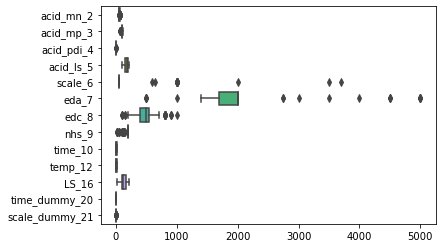

In [5]:
print(subdf.info())
seaborn.boxplot(data =subdf, orient = 'h')
plt.show()

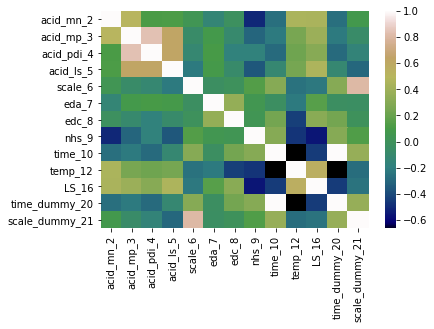

In [6]:
core_matrix = subdf.corr() 
seaborn.heatmap(core_matrix, cmap='gist_earth')
plt.show()

In [7]:
models = ['Linear Regression', 'XGBoost','SVM']
filenames = []
results=[]
scores = []
c = subdf.take([1,3,6,9,11,12],axis=1)

## Define function to evaluate model performance 

In [8]:
def regression_results(name, y_test, y_pred):
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
    r2=metrics.r2_score(y_test, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    return name, r2, np.sqrt(mse), mean_absolute_error

## Model 1: Simple linear regression

In [9]:
regr_params = [{'fit_intercept':[True, False],
              'normalize':[True, False],
              }]

m1 = GridSearchCV(LinearRegression(), param_grid=regr_params, n_jobs=-1, cv=5, verbose=5, scoring='neg_mean_squared_error')

X = np.array(subdf.take([1,3,6,9,11,12],axis=1))
y = np.ravel(subdf.take([10],axis=1))


X_train1, X_test, y_train1, y_test = train_test_split(X,y, test_size=0.2, random_state=4296)

## SMOTE algorithm to refine missing data

r_index: 100%|##########################################################################| 6/6 [00:00<00:00, 601.66it/s]


     acid_mp_3   acid_ls_5       edc_8    temp_12  time_dummy_20   scale_6  \
69  109.000000  220.000000  300.000000  20.000000       0.000000  0.000000   
5   108.000000  220.000000  500.000000  20.000000       0.000000  0.000000   
91  103.379000  190.710000  500.000000  20.000000       1.000000  1.000000   
96  103.379000  190.710000  700.000000  20.000000       0.000000  0.000000   
49  108.000000  220.000000  500.000000  12.000000       0.000000  0.000000   
..         ...         ...         ...        ...            ...       ...   
57   97.253570  175.092928  401.573031   3.893935       1.005038  0.000000   
58  108.958828  220.950611   98.432556  19.961153       0.000000  0.003155   
59   90.008552  103.543332  201.594470   3.961437       0.000000  0.000000   
60  100.254974  196.302143  296.649043   3.811150       0.989748  0.002575   
61   91.764744  151.000000  175.209296  14.958141       0.000000  0.000000   

         LS_16  
69  169.000000  
5   173.000000  
91  174.5100

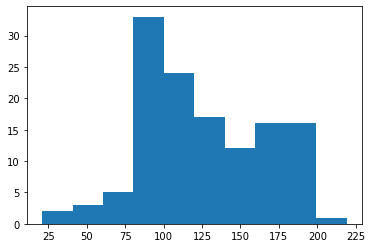

(103, 6) (182, 7)


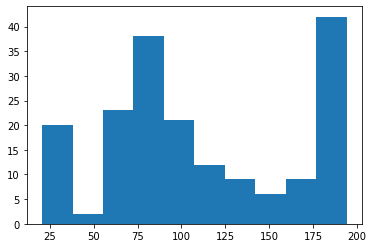

In [10]:

smote = pd.DataFrame(np.column_stack((X_train1,y_train1)), columns=['acid_mp_3','acid_ls_5','edc_8','temp_12','time_dummy_20','scale_6','LS_16'])
LS_smogn = smogn.smoter(
            data = smote,
            y = 'LS_16',
            k=9,
            samp_method='extreme',
            rel_thres = 0.8,        ## positive real number (0 < R < 1)
            rel_method = 'auto',      ## string ('auto' or 'manual')
            rel_xtrm_type = 'both', ## string ('low' or 'both' or 'high')
            rel_coef = 0.4)
print(LS_smogn)

plt.hist(subdf['LS_16'])
plt.show()
plt.hist(LS_smogn['LS_16'])

print(X_train1.shape,LS_smogn.shape)

In [11]:
y_train1 = LS_smogn[['LS_16']]
LS_smogn=LS_smogn.drop(['LS_16'],axis=1)

In [12]:
type(X_train1)

numpy.ndarray

In [13]:
train2 = np.array(LS_smogn)
type(train2)

numpy.ndarray

In [14]:

m1.fit(train2, y_train1)

y_pred_train = m1.predict(train2)
#y_pred = m1.predict(X_val)
y_pred_2 = m1.predict(X_test)

res0 = np.sqrt(mean_squared_error(y_pred_train, y_train1))
#res1 = np.sqrt(mean_squared_error(y_val, y_pred))
res2 = np.sqrt(mean_squared_error(y_test, y_pred_2))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    2.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.3s finished


In [15]:
print('RMSE TRAINING: %.6f' % res0)
#print('RMSE validation: %.6f' % res1)
print('RMSE testing: %.6f' % res2)

RMSE TRAINING: 18.977697
RMSE testing: 20.356085


(array([ 2.,  3.,  5., 33., 24., 17., 12., 16., 16.,  1.]),
 array([ 21. ,  40.8,  60.6,  80.4, 100.2, 120. , 139.8, 159.6, 179.4,
        199.2, 219. ]),
 <BarContainer object of 10 artists>)

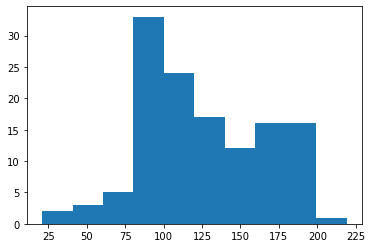

In [16]:
plt.hist(subdf.LS_16)

(array([1., 2., 6., 5., 3., 2., 1., 5., 0., 1.]),
 array([ 43. ,  60.6,  78.2,  95.8, 113.4, 131. , 148.6, 166.2, 183.8,
        201.4, 219. ]),
 <BarContainer object of 10 artists>)

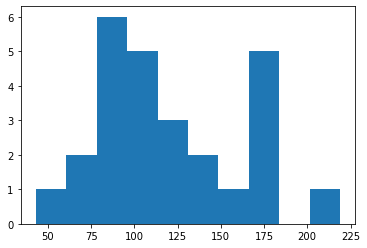

In [17]:
plt.hist(y_test)

(array([1., 2., 6., 3., 2., 5., 3., 0., 2., 2.]),
 array([ 43.87117087,  60.29928195,  76.72739303,  93.15550412,
        109.5836152 , 126.01172629, 142.43983737, 158.86794845,
        175.29605954, 191.72417062, 208.15228171]),
 <BarContainer object of 10 artists>)

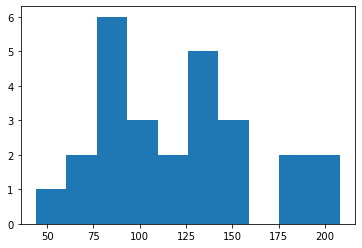

In [18]:
plt.hist(y_pred_2)

In [19]:
m1.best_estimator_

LinearRegression()

In [20]:
scores.append(regression_results(models[0],y_pred_2,y_test))

explained_variance:  0.7578
mean_squared_log_error:  0.0232
r2:  0.7569
MAE:  15.8914
MSE:  414.3702
RMSE:  20.3561


In [21]:
filenames.append('m1.sav')
pickle.dump(m1, open(filenames[0], 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filenames[0], 'rb'))
new = np.array(pd.read_csv(r'test.csv'))
result0 = loaded_model.predict(new)
results.append(np.squeeze(result0))
print(new)
print('\n', np.squeeze(result0))

[[100 196 200   4   1   1]
 [100 196 250   4   1   1]
 [100 196 300   4   1   1]
 [100 196 350   4   1   1]
 [100 196 400   4   1   1]
 [100 196 450   4   1   1]
 [100 196 500   4   1   1]
 [100 196 550   4   1   1]
 [100 196 600   4   1   1]
 [100 196 650   4   1   1]
 [100 196 700   4   1   1]
 [100 196 750   4   1   1]
 [100 196 800   4   1   1]]

 [ 49.83144812  59.31417428  68.79690044  78.2796266   87.76235276
  97.24507891 106.72780507 116.21053123 125.69325739 135.17598355
 144.65870971 154.14143586 163.62416202]


## Model 2: XGBoost

{'max_depth': 1,
 'min_child_weight': 1,
 'eta': 0.3,
 'subsample': 0.9,
 'colsample_bytree': 0.8,
 'objective': 'reg:squarederror',
 'eval_metric': 'rmse',
 'validate_parameters': 1}

In [22]:
xgboost_params_all = [{
                    'learning_rate':np.arange(0.15, 0.31, 0.01),
                    'max_depth':[1],
                    'min_child_weight':[1],
                    'colsample_bytree':[0.8],
                    'subsample':[0.9],
                    'objective':['reg:squarederror'],
                    'eval_metric':['rmse'],
                    'eta':[0.3],
                    'validate_parameters':[1],
                    'n_estimators':np.arange(350,500,10),
                     }]
m2 = GridSearchCV(XGBRegressor(), param_grid=xgboost_params_all, n_jobs=-1, cv=5, verbose=2)

In [23]:
m2.fit(train2,y_train1)

#y_pred_3 = m2.predict(X_val)
y_pred_4 = m2.predict(X_test)

#res3 = np.sqrt(mean_squared_error(y_val, y_pred_3))
res4 = np.sqrt(mean_squared_error(y_test, y_pred_4))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   41.7s finished


RMSE testing: 14.853301


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

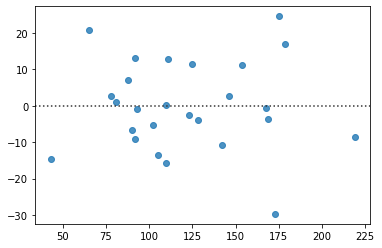

In [24]:
#print('RMSE validation: %.6f' % res3)
print('RMSE testing: %.6f' % res4)
#seaborn.residplot(y_val,y_pred_3)
plt.show()
seaborn.residplot(y_test,y_pred_4)

(array([ 1.,  0.,  0., 10.,  2.,  4.,  3.,  3.,  0.,  3.]),
 array([ 42.58724 ,  57.257195,  71.927155,  86.59711 , 101.26707 ,
        115.93702 , 130.60698 , 145.27693 , 159.94688 , 174.61685 ,
        189.2868  ], dtype=float32),
 <BarContainer object of 10 artists>)

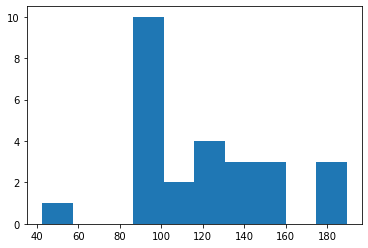

In [25]:
plt.hist(y_pred_4)

(array([1., 2., 6., 5., 3., 2., 1., 5., 0., 1.]),
 array([ 43. ,  60.6,  78.2,  95.8, 113.4, 131. , 148.6, 166.2, 183.8,
        201.4, 219. ]),
 <BarContainer object of 10 artists>)

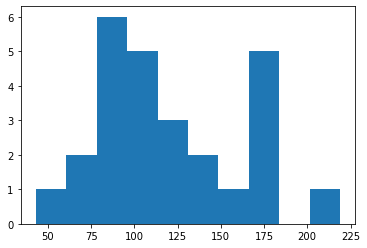

In [26]:
plt.hist(y_test)

In [27]:
scores.append(regression_results(models[1],np.abs(y_pred_4),y_test))

explained_variance:  0.8203
mean_squared_log_error:  0.0157
r2:  0.8182
MAE:  11.1638
MSE:  220.6206
RMSE:  14.8533


In [28]:
filenames.append('m2.sav')
pickle.dump(m2, open(filenames[1], 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filenames[1], 'rb'))
new = np.array(pd.read_csv(r'test.csv'))
result1 = loaded_model.predict(new)
results.append(result1)
print(new)
print('\n', result1)

[[100 196 200   4   1   1]
 [100 196 250   4   1   1]
 [100 196 300   4   1   1]
 [100 196 350   4   1   1]
 [100 196 400   4   1   1]
 [100 196 450   4   1   1]
 [100 196 500   4   1   1]
 [100 196 550   4   1   1]
 [100 196 600   4   1   1]
 [100 196 650   4   1   1]
 [100 196 700   4   1   1]
 [100 196 750   4   1   1]
 [100 196 800   4   1   1]]

 [ 40.882526  58.716442  80.963295  86.06068   91.86607  101.99075
 106.6033   107.50154  109.57639  113.53199  112.07389  129.42404
 129.42404 ]


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


<BarContainer object of 6 artists>

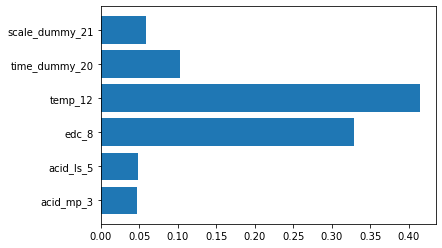

In [29]:
plt.barh(c.columns, m2.best_estimator_.feature_importances_)

## Model 3: Support Vector Machine

In [30]:
svm_params = [{'C': [5],
              'kernel': ["linear"],
            'cache_size': [200],
           'gamma': ['auto'],
           'degree':[x for x in range(1,5,1)],              
           }]
m3 = GridSearchCV(SVR(), param_grid=svm_params, n_jobs=-1, cv=5, verbose=2)

In [31]:
m3.fit(train2,y_train1)

#y_pred_5 = m3.predict(X_val)
y_pred_6 = m3.predict(X_test)

#res5 = np.sqrt(mean_squared_error(y_val, y_pred_5))
res6 = np.sqrt(mean_squared_error(y_test, y_pred_6))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    6.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RMSE testing: 21.318732


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

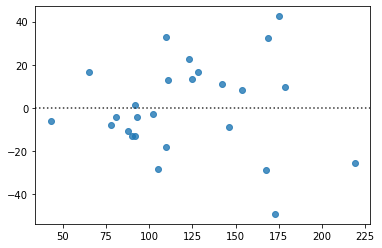

In [32]:
#print('RMSE validation: %.6f' % res5)
print('RMSE testing: %.6f' % res6)
#seaborn.residplot(y_val,y_pred_5)
plt.show()
seaborn.residplot(y_test,y_pred_6)

In [33]:
scores.append(regression_results(models[2],y_pred_6,y_test))

explained_variance:  0.7452
mean_squared_log_error:  0.0253
r2:  0.7444
MAE:  16.3486
MSE:  454.4883
RMSE:  21.3187


In [34]:
filenames.append('m3.sav')
pickle.dump(m3, open(filenames[2], 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filenames[2], 'rb'))
new = np.array(pd.read_csv(r'test.csv'))
result2 = loaded_model.predict(new)
results.append(result2)
print(new)
print('\n', result2)

[[100 196 200   4   1   1]
 [100 196 250   4   1   1]
 [100 196 300   4   1   1]
 [100 196 350   4   1   1]
 [100 196 400   4   1   1]
 [100 196 450   4   1   1]
 [100 196 500   4   1   1]
 [100 196 550   4   1   1]
 [100 196 600   4   1   1]
 [100 196 650   4   1   1]
 [100 196 700   4   1   1]
 [100 196 750   4   1   1]
 [100 196 800   4   1   1]]

 [ 46.1745879   55.89000921  65.60543053  75.32085185  85.03627316
  94.75169448 104.4671158  114.18253711 123.89795843 133.61337975
 143.32880106 153.04422237 162.75964369]


In [35]:
scores

[('Linear Regression',
  0.7569474472459052,
  20.356085379503252,
  15.891385884644109),
 ('XGBoost', 0.8181737069343615, 14.853301030461719, 11.163837591317984),
 ('SVM', 0.744442022395928, 21.318731693294836, 16.348632795649323)]

In [36]:
(scores[0][2]+scores[1][2]+scores[2][2])/3

18.842706034419937

In [37]:
results

[array([ 49.83144812,  59.31417428,  68.79690044,  78.2796266 ,
         87.76235276,  97.24507891, 106.72780507, 116.21053123,
        125.69325739, 135.17598355, 144.65870971, 154.14143586,
        163.62416202]),
 array([ 40.882526,  58.716442,  80.963295,  86.06068 ,  91.86607 ,
        101.99075 , 106.6033  , 107.50154 , 109.57639 , 113.53199 ,
        112.07389 , 129.42404 , 129.42404 ], dtype=float32),
 array([ 46.1745879 ,  55.89000921,  65.60543053,  75.32085185,
         85.03627316,  94.75169448, 104.4671158 , 114.18253711,
        123.89795843, 133.61337975, 143.32880106, 153.04422237,
        162.75964369])]

In [38]:
test = pd.read_csv(r'test.csv')
ensemble = pd.DataFrame(data=results,columns = np.array(test.edc))

test

,mp,acid_ls,edc,temp,time,scale
0,100,196,200,4,1,1
1,100,196,250,4,1,1
2,100,196,300,4,1,1
3,100,196,350,4,1,1
4,100,196,400,4,1,1
5,100,196,450,4,1,1
6,100,196,500,4,1,1
7,100,196,550,4,1,1
8,100,196,600,4,1,1
9,100,196,650,4,1,1


In [39]:
ensemble.index=models
ensemble

,200,250,300,350,400,450,500,550,600,650,700,750,800
Linear Regression,49.831448,59.314174,68.796900,78.279627,87.762353,97.245079,106.727805,116.210531,125.693257,135.175984,144.658710,154.141436,163.624162
XGBoost,40.882526,58.716442,80.963295,86.060677,91.866074,101.990753,106.603302,107.501541,109.576393,113.531990,112.073891,129.424042,129.424042
SVM,46.174588,55.890009,65.605431,75.320852,85.036273,94.751694,104.467116,114.182537,123.897958,133.613380,143.328801,153.044222,162.759644


In [40]:
mean=ensemble.mean()
test = test.set_index('edc')
test['avg_prediction'] = mean
test

,mp,acid_ls,temp,time,scale,avg_prediction
edc,,,,,,
200,100,196,4,1,1,45.629521
250,100,196,4,1,1,57.973542
300,100,196,4,1,1,71.788542
350,100,196,4,1,1,79.887052
400,100,196,4,1,1,88.221567
450,100,196,4,1,1,97.995842
500,100,196,4,1,1,105.932741
550,100,196,4,1,1,112.631536
600,100,196,4,1,1,119.722536


Text(0, 0.5, 'Linker Score')

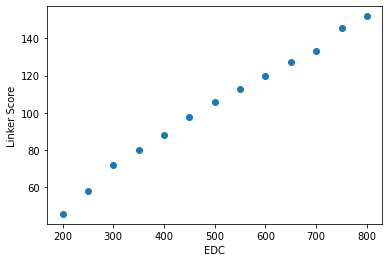

In [41]:
plt.scatter(test.index,test.avg_prediction)
plt.xlabel('EDC')
plt.ylabel('Linker Score')

In [42]:
res7 = np.sqrt(mean_squared_error(y_test,(np.squeeze(y_pred_2)+y_pred_4+y_pred_6)/3))
res7

17.363642788250083